In [3]:
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import normalize

In [4]:
def parse_fasta_to_dataframe(fasta_path):
    records = []
    with open(fasta_path, 'r') as file:
        name, tag, seq_lines = None, None, []
        for line in file:
            line = line.strip()
            if line.startswith('>'):
                if name:
                    sequence = ''.join(seq_lines)
                    records.append({'name': name, 'tag': tag, 'sequence': sequence})
                # 处理新的记录
                header = line[1:]  # 去掉'>'符号
                # 从header中提取name和tag（分割最后一个下划线）
                if '_' in header:
                    # 找到最后一个下划线的位置
                    last_underscore_index = header.rfind('_')
                    name = header[:last_underscore_index]  # 下划线之前的部分作为name
                    tag_str = header[last_underscore_index + 1:]  # 下划线之后的部分作为tag
                    try:
                        tag = int(tag_str)  # 将tag转换为整数
                    except ValueError:
                        tag = None  # 如果转换失败，设为None
                else:
                    name = header
                    tag = None
                seq_lines = []
            else:
                seq_lines.append(line)
        # 添加最后一条记录
        if name:
            sequence = ''.join(seq_lines)
            records.append({'name': name, 'tag': tag, 'sequence': sequence})
    
    return pd.DataFrame(records)

In [5]:
df = parse_fasta_to_dataframe('/lulabdata3/huangkeyun/zhangys/RNA_locator/ML_python_scripts/ML_models/circRNA_ML_Model_tridivided_Output/test_set_sequences.fasta')
df

,name,tag,sequence
0,hsa_circ_0003441,0,GTATCTTTCAGATGAAGGCATTGAAGCTTGCACAAGCTCTCCAGAC...
1,hsa_circ_0001288,1,GTGAGTGTGGCTTACACATGTATTTCCTGATCATTTGGGAGTCCGT...
2,mmu_circ_0000992,0,GCGGGTGCCAATATTGACACTTGCTCAGAGGACCAGCGGACCCCAC...
3,hsa_circ_0072088,0,CCCTTACGTCGTCCTGACTCATCTGATGACCGTTATGTAATGACAA...
4,hsa_circ_0058493,1,GTTCAGCCGTCTGTATATCTCCCCAGATACCTGAAACTGACCACCT...
...,...,...,...
361,hsa_circ_0103871,1,ATAATAGTGGAACCATGGATTTATTTGGAGGTGCAGATGATATCTC...
362,hsa_circ_0100146,1,GTCAGTGAGGAATCAGGGAATCCCCTAAGAGACAGTGGCAATTAAT...
363,hsa_circ_0002109,0,AGGAATTAAGGAATTTGCAAGAGCAAATGAAGGCCTTACAAGAGCA...
364,hsa_circ_0021553,1,AAATGCACAGCGGTATTGATGAGTAGATCCTTGGATTCAGAGGTTG...


In [6]:
pred = pd.read_csv('/lulabdata3/huangkeyun/zhangys/RNA_locator/repeated_works/RNAlocate/predictions.csv')

In [7]:
evaluate_df = pd.concat([df, pred], axis = 1)
evaluate_df

,name,tag,sequence,sequence,label,pred
0,hsa_circ_0003441,0,GTATCTTTCAGATGAAGGCATTGAAGCTTGCACAAGCTCTCCAGAC...,GTATCTTTCAGATGAAGGCATTGAAGCTTGCACAAGCTCTCCAGAC...,1,1.000000
1,hsa_circ_0001288,1,GTGAGTGTGGCTTACACATGTATTTCCTGATCATTTGGGAGTCCGT...,GTGAGTGTGGCTTACACATGTATTTCCTGATCATTTGGGAGTCCGT...,1,1.000000
2,mmu_circ_0000992,0,GCGGGTGCCAATATTGACACTTGCTCAGAGGACCAGCGGACCCCAC...,GCGGGTGCCAATATTGACACTTGCTCAGAGGACCAGCGGACCCCAC...,1,0.997568
3,hsa_circ_0072088,0,CCCTTACGTCGTCCTGACTCATCTGATGACCGTTATGTAATGACAA...,CCCTTACGTCGTCCTGACTCATCTGATGACCGTTATGTAATGACAA...,1,1.000000
4,hsa_circ_0058493,1,GTTCAGCCGTCTGTATATCTCCCCAGATACCTGAAACTGACCACCT...,GTTCAGCCGTCTGTATATCTCCCCAGATACCTGAAACTGACCACCT...,1,1.000000
...,...,...,...,...,...,...
361,hsa_circ_0103871,1,ATAATAGTGGAACCATGGATTTATTTGGAGGTGCAGATGATATCTC...,ATAATAGTGGAACCATGGATTTATTTGGAGGTGCAGATGATATCTC...,1,1.000000
362,hsa_circ_0100146,1,GTCAGTGAGGAATCAGGGAATCCCCTAAGAGACAGTGGCAATTAAT...,GTCAGTGAGGAATCAGGGAATCCCCTAAGAGACAGTGGCAATTAAT...,1,1.000000
363,hsa_circ_0002109,0,AGGAATTAAGGAATTTGCAAGAGCAAATGAAGGCCTTACAAGAGCA...,AGGAATTAAGGAATTTGCAAGAGCAAATGAAGGCCTTACAAGAGCA...,1,1.000000
364,hsa_circ_0021553,1,AAATGCACAGCGGTATTGATGAGTAGATCCTTGGATTCAGAGGTTG...,AAATGCACAGCGGTATTGATGAGTAGATCCTTGGATTCAGAGGTTG...,1,1.000000


In [8]:
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, average_precision_score, matthews_corrcoef

evaluate_df['prediction'] = evaluate_df['label']

auroc = roc_auc_score(evaluate_df["tag"], evaluate_df["prediction"])
auprc = average_precision_score(evaluate_df["tag"], evaluate_df["prediction"])
accuracy = accuracy_score(evaluate_df['tag'], evaluate_df['prediction'])
f1 = f1_score(evaluate_df['tag'], evaluate_df['prediction'])
mcc = matthews_corrcoef(evaluate_df['tag'], evaluate_df['prediction'])

print(f"AUROC: {auroc:.4f}")
print(f"AUPRC: {auprc:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"MCC: {mcc:.4f}")

AUROC: 0.5164
AUPRC: 0.5084
Accuracy: 0.5164
F1 Score: 0.6481
MCC: 0.0495


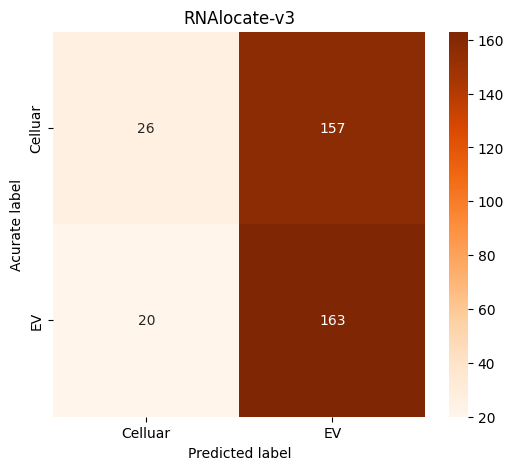

In [9]:
cm = confusion_matrix(evaluate_df['tag'], evaluate_df['prediction'])

# 使用 seaborn 绘制混淆矩阵
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['Celluar', 'EV'], yticklabels=['Celluar', 'EV'])
plt.title('RNAlocate-v3')
plt.ylabel('Acurate label')
plt.xlabel('Predicted label')
plt.show()